<a href="https://colab.research.google.com/github/komal021406/ML/blob/main/Student_Data_Analysis_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Titanic Data Analysis

## Section 1: Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg. This tragic event resulted in the deaths of 1502 out of 2224 passengers and crew members. The disaster led to significant improvements in maritime safety regulations.

Despite the element of luck involved in surviving the sinking, certain groups of people were more likely to survive than others. For example, women, children, and passengers from the upper-class had higher survival rates.

<center><img src="https://miro.medium.com/v2/resize:fit:1200/0*hAU1Aa8kYPAbyfuz.jpg" width = 500 height = 300 /></center>

In this notebook, we will analyze the Titanic dataset to uncover the factors that influenced the survival of the passengers. We will employ various data analysis techniques commonly called as Exploratory Data Analysis(EDA). Our objectives are to:

1. Load and understand the dataset.
2. Clean the data by handling missing values and converting data types.
3. Perform data analysis by visualization to uncover patterns and insights.
4. Check for outliers and handle them.
5. Explore feature engineering techniques.     
<hr></hr>


## Section 2: Analyzing the Titanic Dataset


### Step 1. Loading the Dataset

Before we dive into analyzing the Titanic dataset, we need to load the data and perform some initial inspections to understand its structure and contents.

#### Kaggle Sourcing

The Titanic dataset is a well-known dataset that is often used for data science and machine learning projects. It is available on Kaggle, where you can download the dataset and use it for various analyses. You can access the Titanic dataset on Kaggle [here](https://www.kaggle.com/c/titanic).

#### Using Seaborn

For this analysis, we will use the seaborn library to load the Titanic dataset. Seaborn provides a version of this dataset that is clean and ready for analysis, ensuring a smooth workflow.


        

In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

### How do we see the loaded data?

**Displaying the First Few Rows:**
   To get an initial sense of the data, we display the first few rows of the dataset using the `head()` method. This helps us understand the structure and some example entries in the dataset.

In [ ]:
# Display the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Observations

- The dataset contains several features (columns) such as `survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`, etc.


**Understanding the Dataset Structure:**
   The `info()` method provides a concise summary of the dataset, including the number of non-null entries, data types of each column, and memory usage.
<center><img src="https://miro.medium.com/v2/resize:fit:1151/0*eungLD07OZh0p_H6.png" width = 600 height = 300/></center>

In [ ]:
# Display the structure of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Observations
- The dataset consists of both categorical and numerical data types.

**Checking for Missing Values:**
   Missing data can significantly impact our analysis. To identify columns with missing values, we use the `isnull().sum()` method.

In [ ]:
# Check for missing values in the dataset
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### Observations


- There are missing values in columns like `age`, `embarked`, and `deck`.


### Step 2: Summary Statistics

#### 2.1 Descriptive Statistics for Numerical Features

Descriptive statistics summarize the main characteristics of numerical data. They include measures of central tendency (mean, median), dispersion (standard deviation, variance), and range (minimum, maximum). These statistics provide insights into the data's distribution and variability.

Let's calculate and interpret the descriptive statistics for the numerical features in our dataset:

The `describe()` method provides the following summary statistics for numerical features:

- **Count:** The number of non-missing values.
- **Mean:** The average value.
- **Std (Standard Deviation):** A measure of the amount of variation or dispersion of the values.
- **Min and Max:** The minimum and maximum values.
- **25%, 50%, and 75% (Quartiles):** Values that divide the data into four equal parts.



In [ ]:
# Summary Statistics Before Cleaning

# Descriptive statistics for numerical features
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Interpretation of Descriptive Statistics for Numerical Features


#### Survived
- **Count**: 891 passengers were included in the dataset.
- **Mean**: 0.384 (Approximately 38.4% of the passengers survived).
- **Standard Deviation**: 0.487 indicates variability in survival, with a higher proportion of non-survivors.
- **Min and Max**: The dataset includes passengers who both survived (1) and did not survive (0).

#### Pclass (Passenger Class)
- **Count**: 891
- **Mean**: 2.309, indicating that a majority of passengers traveled in the lower classes (Second or Third).
- **Standard Deviation**: 0.836 shows that there is a spread across the three classes.
- **Distribution**: The dataset includes passengers from all three classes, with First class (1) and Third class (3) being the minimum and maximum, respectively.

#### Age
- **Count**: 714 (Missing 177 values, which highlights the need for data cleaning).
- **Mean**: 29.70 years, indicating the average age of passengers was around 30.
- **Standard Deviation**: 14.53, showing a wide age range among passengers.
- **Min and Max**: The youngest passenger was 0.42 years old, and the oldest was 80 years old.
- **Percentiles**:
  - 25th percentile (Q1): 20.125 years (young adults)
  - Median (Q2): 28 years
  - 75th percentile (Q3): 38 years (middle-aged adults)

#### SibSp (Number of Siblings/Spouses Aboard)
- **Count**: 891
- **Mean**: 0.523, indicating most passengers had about one sibling or spouse aboard.
- **Standard Deviation**: 1.103 shows that most passengers had zero or one sibling/spouse aboard, but there were a few with more.
- **Range**: From 0 (no siblings/spouses) to 8 (large families).

#### Parch (Number of Parents/Children Aboard)
- **Count**: 891
- **Mean**: 0.382, suggesting most passengers traveled without parents or children.
- **Standard Deviation**: 0.806, with variability indicating that while most had none, some passengers had up to 6 parents/children aboard.

#### Fare
- **Count**: 891
- **Mean**: 32.20, indicating the average fare paid.
- **Standard Deviation**: 49.69, showing a high variability in fare prices.
- **Range**: From 0.00 (some passengers did not pay a fare) to 512.33 (indicating very high fares, likely for first-class passengers).
- **Percentiles**:
  - 25th percentile: 7.91 (lower fare range)
  - Median: 14.45
  - 75th percentile: 31.00 (upper fare range)


#### 2.2 Frequency Distribution for Categorical Features

Frequency distribution summarizes how often each category appears in the dataset. It provides insights into the composition and distribution of categorical variables.

In [ ]:
# Frequency distribution for categorical features
titanic.describe(include=['category'])

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59



### Interpretation of Frequency Distribution for Categorical Features (Before Cleaning)

The categorical features provide insight into the distribution of non-numerical attributes in the dataset.

#### Class
- **Count**: 891 passengers.
- **Unique**: 3 classes (First, Second, Third).
- **Most Frequent**: Third class with 491 passengers, indicating the majority traveled in the lowest class.

#### Deck
- **Count**: 203 (missing 688 values, showing a significant amount of missing data).
- **Unique**: 7 decks (A, B, C, D, E, F, G).
- **Most Frequent**: Deck C with 59 passengers, indicating the highest number of passengers for whom deck information is available.

<hr></hr>

## Section 3: Data Cleaning: An Essential Step in Data Analysis

Data cleaning is a critical process in data analysis, ensuring the data is accurate, consistent, and suitable for analysis. This process involves handling missing values, converting data types, and removing duplicates, among other tasks. Properly cleaned data leads to more reliable and valid analysis results, while uncleaned data can produce misleading insights.

<center><img src="https://funnel.io/hs-fs/hubfs/Data%20cleaning%20process%20info.png?width=1200&height=800&name=Data%20cleaning%20process%20info.png" width=500 height=300/></center>

#### 3.1 Handling Missing Values

Missing values can significantly impact the results of data analysis. They can skew the data, introduce bias, and reduce the representativeness of the dataset. Therefore, handling missing values appropriately is crucial. One common approach to handle missing data is imputation, where missing values are filled in with substituted values.

<center><img src="https://analyticsindiamag.com/wp-content/uploads/2018/02/missing-values.png" width=600/></center>

Imputation can be simple, such as filling missing values with the mean, median, or mode of the column, or more complex, such as using algorithms to predict missing values. However, before deciding on an imputation method, it's important to consider the proportion of missing data.


#### Strategies to Handle Missing Values

1. **Dropping Columns with Many Missing Values:**
   - When a column has a large proportion of missing values, it may be more practical to drop it altogether. For example, in the Titanic dataset, the `deck` column might be dropped due to its high number of missing values. Keeping such a column may not contribute valuable information and could complicate the analysis.

2. **Filling Missing Values - Imputation:**
   - **Numerical Data:** Missing values in numerical columns, such as age, can be filled with measures of central tendency. The median is often used because it is less affected by outliers compared to the mean. Filling missing numerical values with the median helps maintain the central trend of the data without being skewed by extreme values.
   - **Categorical Data:** For categorical columns, such as `embarked`, the mode (most frequent value) can be used to fill missing values. This approach ensures that the most common category is represented, maintaining the integrity of the categorical distribution.

3. **Dropping Rows with Missing Values:**
   - In some cases, it may be appropriate to drop rows with missing values, especially if the missing data is minimal and randomly distributed. For example, dropping rows where the `embark_town` is missing might be justified if only a small number of rows are affected. This approach minimizes data loss while ensuring completeness.

In [ ]:
# Display dataset info before handling missing values
print("Dataset Info before handling missing values:")
titanic.info()

# Dropping 'deck' due to many missing values
if 'deck' in titanic.columns:
    titanic = titanic.drop(columns=['deck'])

# Fill missing 'age' values with the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing 'embarked' values with the mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop rows where 'embark_town' is missing
titanic.dropna(subset=['embark_town'], inplace=True)

# Display dataset info after handling missing values
print("Dataset Info After handling missing values:")
titanic.info()

Dataset Info before handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Dataset Info After handling missin

#### Observation:

There are no missing values in the dataset.

### 3.2 Data Type Conversion

Data type conversion is vital to ensure that each column is in the appropriate format for analysis. Incorrect data types can lead to errors and misinterpretations during analysis.

#### Appropriate Data Types

- **Categorical Data:** Columns like `sex`, `embarked`, `class`, and `who` should be converted to the categorical data type. This conversion optimizes memory usage and provides better performance for categorical operations and analysis.
- **Boolean Data:** Columns representing binary outcomes, such as `adult_male` and `alone`, should be converted to the boolean data type. This conversion ensures clarity and precision in representing true/false conditions.



In [ ]:
# Display dataset info before data type conversion
print("Dataset Info before data type conversion:")
titanic.info()

# Data type conversion
titanic['sex'] = titanic['sex'].astype('category')
titanic['embarked'] = titanic['embarked'].astype('category')
titanic['class'] = titanic['class'].astype('category')
titanic['who'] = titanic['who'].astype('category')
titanic['adult_male'] = titanic['adult_male'].astype('bool')
titanic['alone'] = titanic['alone'].astype('bool')

# Display dataset info after data type conversion
print("Dataset Info after data type conversion:")
titanic.info()

Dataset Info before data type conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB
Dataset Info after data type conversion:
<class 'pandas.core.frame.DataFrame'>
Index:

### 3.3 Removing Duplicates

Duplicate rows in a dataset can skew analysis results and introduce bias. Identifying and removing duplicates is crucial to maintaining the integrity of the data.

#### Identifying and Removing Duplicates

- **Checking for Duplicates:** The first step is to identify any duplicate rows in the dataset. This can be done by calculating the number of duplicated entries.
- **Removing Duplicates:** If duplicates are found, they should be removed to ensure that each data point is unique. This step prevents redundant information from affecting the analysis outcomes.
<center><img src="https://www.freecodecamp.org/news/content/images/2020/05/excel-1-1.jpg" width=400 height =400/></center>

In [ ]:
# Check for duplicates
duplicates = titanic.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 116


In [ ]:
# Removing duplicates
if duplicates > 0:
    titanic = titanic.drop_duplicates()

# Check for duplicates
duplicates = titanic.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#### Observation:
There are no duplicate entries in the dataset.

In [ ]:
# Check the dataset info after data cleaning
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     773 non-null    int64   
 1   pclass       773 non-null    int64   
 2   sex          773 non-null    category
 3   age          773 non-null    float64 
 4   sibsp        773 non-null    int64   
 5   parch        773 non-null    int64   
 6   fare         773 non-null    float64 
 7   embarked     773 non-null    category
 8   class        773 non-null    category
 9   who          773 non-null    category
 10  adult_male   773 non-null    bool    
 11  embark_town  773 non-null    object  
 12  alive        773 non-null    object  
 13  alone        773 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(2)
memory usage: 59.4+ KB


<hr></hr>

## Section 4: Data Analysis by Visualization

Data Analysis by Visualization is a critical step in understanding the underlying patterns, anomalies, and relationships within a dataset. It involves various techniques to summarize the main characteristics of the data, often using visual methods. It helps in identifying trends, spotting anomalies, testing hypotheses, and checking assumptions. This comprehensive analysis will cover univariate, bivariate, and multivariate analysis.


### 4.1 Univariate Analysis

Univariate analysis focuses on examining one variable at a time. It helps in understanding the distribution, central tendency, and variability of individual variables.



### 4.1.1 What do you know about the age of the passengers travelled in Titanic?

Let's understand this with the help of the **Age Distribution Plot**.

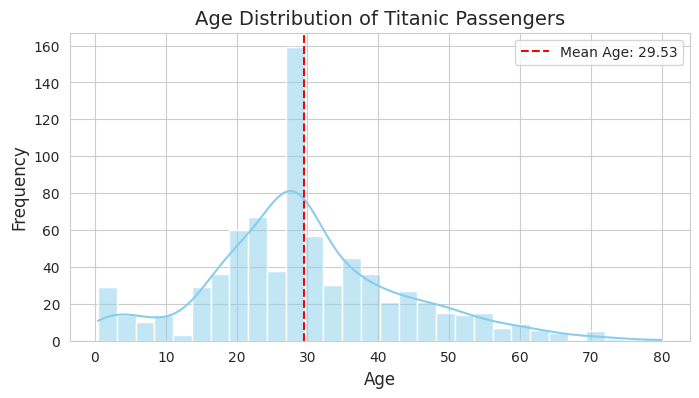

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and the axes
plt.figure(figsize=(8, 4))

# Plot the distribution of age
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color='skyblue')

# Add titles and labels
plt.title('Age Distribution of Titanic Passengers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean age
mean_age = titanic['age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1.5, label=f'Mean Age: {mean_age:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Interpretation of the Age Distribution Plot

The plot visualizes the distribution of the ages of Titanic passengers. Here are the key insights:

   - The distribution of ages is right-skewed, with a majority of passengers clustered around younger ages.
   - There is a peak around the age of 30, indicating that this age group had the highest number of passengers.
   - Mean age: 29.53 years. The mean age falls within the most frequent age group, aligning with the peak of the distribution.
   - Age range: From infancy (around 0.42 years) to 80 years, showing a wide age range among passengers.
   - The spread of the data is evident from the histogram, with fewer passengers in the older age groups.

### 4.1.2 What do you know about the fare of the passengers travelled in Titanic?

Let's understand this with the help of the **Fare Distribution Plot**.

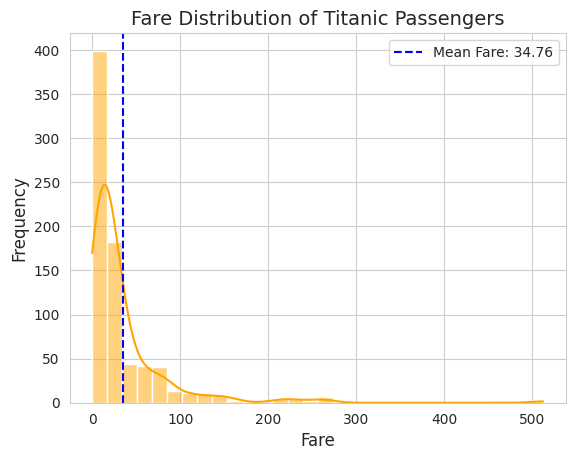

In [ ]:
# Plot the distribution of fare with a different color
sns.histplot(titanic['fare'].dropna(), bins=30, kde=True, color='orange')

# Add titles and labels
plt.title('Fare Distribution of Titanic Passengers', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean fare
mean_fare = titanic['fare'].mean()
plt.axvline(mean_fare, color='blue', linestyle='--', linewidth=1.5, label=f'Mean Fare: {mean_fare:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Interpretation of the Fare Distribution Plot

The plot visualizes the distribution of the fares paid by Titanic passengers. Here are the key insights:

   - The distribution of fares is highly right-skewed, with the majority of passengers paying lower fares.
   - There is a significant peak at the lower end of the fare range, indicating that many passengers paid relatively low fares.
   - Mean fare:32.10.
   - The fares range from 0 to over 500, showing a wide range of ticket prices.
   - The spread of the data is evident from the histogram, with a long tail extending towards higher fare values, indicating that a few passengers paid significantly higher fares.

### 4.1.3 What do you know about the gender of the passengers travelled in Titanic?

Let's understand this with the help of the **Gender Distribution Plot**.

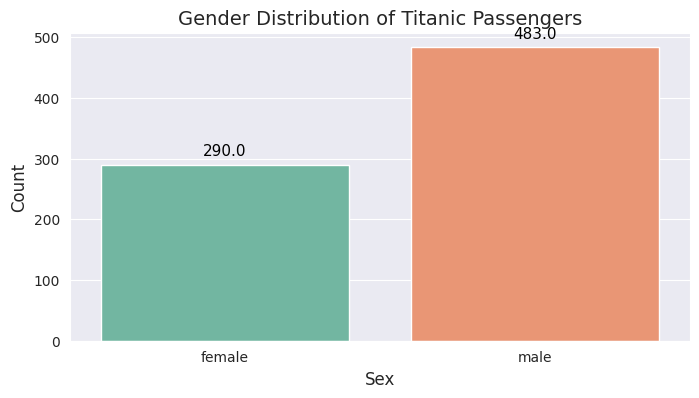

In [ ]:
# Code to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(8, 4))

# Plot the gender distribution with an improved color palette and aesthetics
sns.countplot(x='sex', data=titanic, palette='Set2')

# Add titles and labels
plt.title('Gender Distribution of Titanic Passengers', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with the count of each category
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')

# Show the plot
plt.show()

### Interpretation of Gender Distribution Plot:
- There were more males in the titanic compared to females.

### 4.1.3 Were there any child passengers? If so, what was their percentage compared to men & women?

Let's understand this with the help of the **Passenger Type Distribution Plot**.

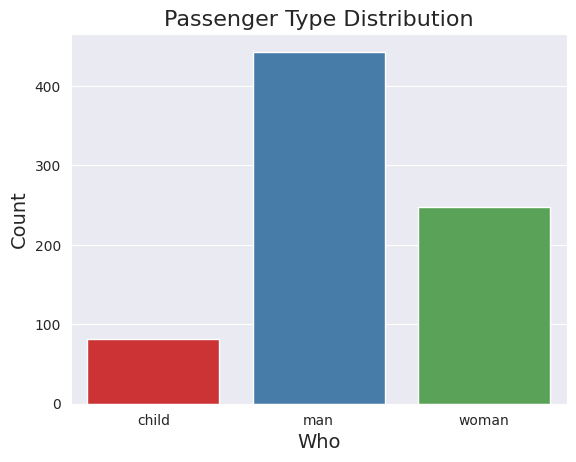

In [ ]:
# Create a plot
sns.countplot(x='who', data=titanic, palette='Set1')

# Add titles and labels with improved font sizes
plt.title('Passenger Type Distribution', fontsize=16)
plt.xlabel('Who', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

### 4.2 Bivariate Analysis

Bivariate analysis refers to the statistical analysis of two variables, with the aim of determining the empirical relationship between them. This type of analysis is essential in understanding how two different factors interact with one another and can provide insights that are not apparent when analyzing each variable individually.

Bivariate analysis helps in identifying whether a relationship exists between two variables and the nature of that relationship (positive, negative, or no correlation).
<center><img src="https://mathtec.weebly.com/uploads/2/9/0/5/29050183/header_images/1518820720.jpg" width=500/></center>


#### Example:

In the context of the Titanic dataset, conducting a bivariate analysis of **age** and **fare** can reveal several insights:

- Analyzing whether certain age groups had a higher or lower probability of survival based on the fare they paid for their tickets. For instance, it might be observed that younger passengers who paid higher fares had a higher survival rate.
  
- Help visualize trends, such as whether older passengers tended to pay less or more for their tickets compared to younger passengers.

- The analysis may also reveal outliers.


### 4.2.1 Who has better survival - Young or old? Who paid more fare - Young or old?

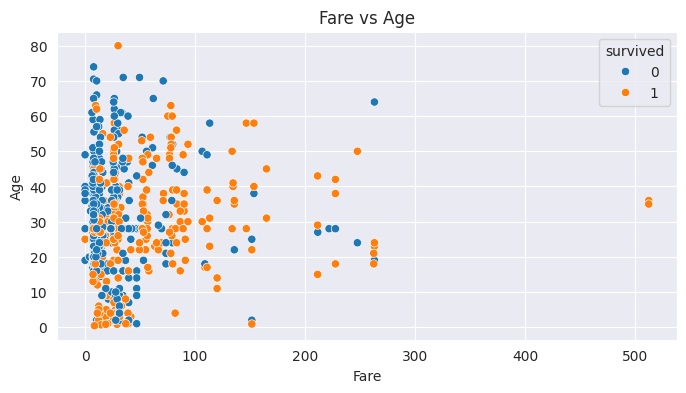

In [ ]:
# Scatter Plot on Age vs Fare separating the survival status as well

plt.figure(figsize=(8, 4))
sns.scatterplot(x='fare', y='age', hue='survived', data=titanic)
plt.title('Fare vs Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

### Interpretation:
This scatter plot represents a bivariate analysis of Age vs Fare, categorized by the survival status of passengers on the Titanic. The data points are color-coded based on whether the passengers survived (orange) or not (blue).

- Higher fares seem to be more associated with survival (orange dots).
- Both survivors and non-survivors are distributed across all age groups.
- There is a notable cluster of young children (ages 0-10) who survived.
- Survivors (orange) are more dispersed across different fare ranges, especially at higher fares.
- Non-survivors (blue) are densely clustered at lower fare ranges, indicating that lower fare passengers had a lower survival rate.

### 4.2.2 From the bivariate scatter plot, we observed age and fare relate to survival status. Can we delve deeper into how age/fare alone is distributed among those who survived and those who didn't?

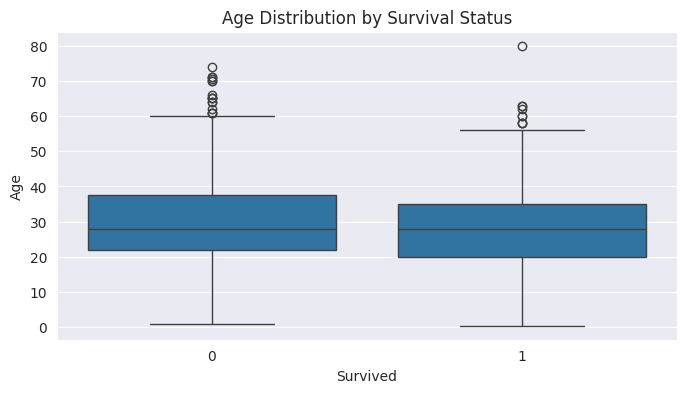

In [ ]:
# Age vs. Survived
plt.figure(figsize=(8, 4))
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

### Interpretation:
- Both survivors and non-survivors have similar median ages, around 28-30 years
- The central age groups (middle 50%) for both survivors and non-survivors are quite similar, indicating that the majority of people fall into the same age range for both groups.
- There are more older individuals who did not survive, shown as outliers in the non-survivor group, confirming the scatter plot where we saw older non-survivors.
- Non-survivors have a slightly wider range of ages, meaning there is more variation in the ages of people who didn't survive.
- Both the scatter plot and box plot indicate that more young children survived, shown by the lower age range in survivors.

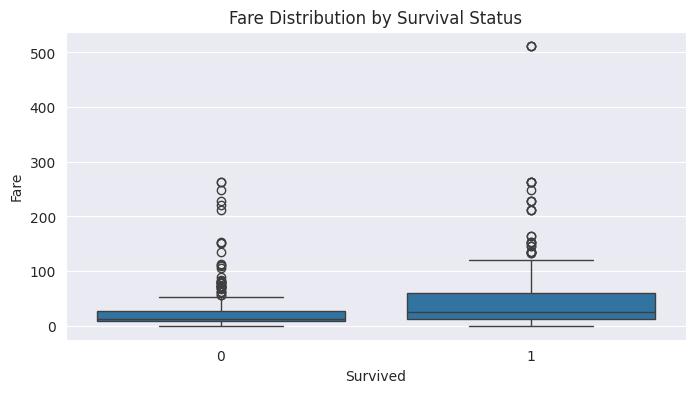

In [ ]:
# Fare vs. Survived
plt.figure(figsize=(8, 4))
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

#### Interpretation:
- The median fare for survivors is significantly higher than for non-survivors. This confirms the scatter plot observation that higher fares are associated with higher survival rates.
- Survivors have a broader interquartile range (IQR), indicating a wider spread of fares among those who survived.
- Both survivors and non-survivors have fare outliers, but the outliers for survivors are higher, reaching up to 500 units. This supports the scatter plot finding that some high fare passengers survived.
- The majority of non-survivors paid lower fares, as shown by the lower median and tighter IQR. This aligns with the scatter plot where many non-survivors paid fares below 100 units.
- The overall spread of fares (range) is wider for survivors compared to non-survivors, showing that those who paid higher fares had a better chance of surviving.

### 4.3 Multivariate Analysis


Multivariate analysis refers to a set of statistical techniques used to analyze data that involves more than two variables. It is a crucial part of data analysis that allows researchers to understand the relationships and interactions among multiple variables simultaneously. By examining multiple variables at once, we can gain deeper insights into complex datasets and uncover patterns that may not be evident when analyzing each variable in isolation.

Multivariate analysis helps in exploring how several variables interact with each other and identifying underlying relationships. This can be done by correlation analysis of multiple variables simulataneously using heat maps and pair plots.
<center><img src="https://i.sstatic.net/8UBdC.png" width=400 height=300/></center>

#### Example:

In the context of the Titanic dataset, multivariate analysis can be applied to predict the likelihood of survival based on several factors, such as age, fare, passenger class, and gender.



### 4.3.1 Find out the highly correlated variables

This can be done using 2 ways:
- Heat Maps
- Pair Plots

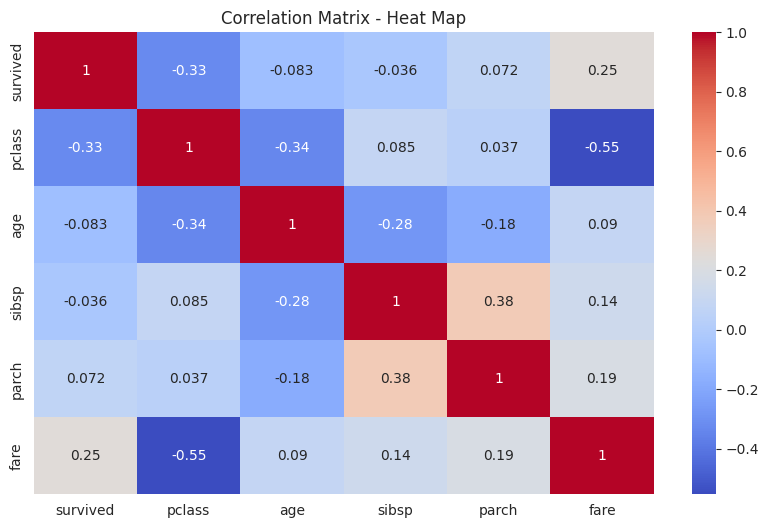

In [ ]:
# Correlation matrix - Heat Map
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation matrix
numerical_cols = titanic.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Heat Map')
plt.show()

### Interpretation:
- Positive correlation (0.25) between survival and fare: Higher fares are associated with higher survival likelihood.
- Negative correlation (-0.33) between survival and passenger class: Higher-class passengers were more likely to survive.
- Weak correlations between survival and age, siblings/spouses aboard (sibsp), and parents/children aboard (parch).
- Strong negative correlation (-0.55) between fare and passenger class: Higher classes paying higher fares.
- Negative correlation (-0.34) between age and passenger class: Older passengers tend to be in higher classes.
- Moderate positive correlation (0.38) between siblings/spouses aboard (sibsp) and parents/children aboard (parch), indicating families traveling together.

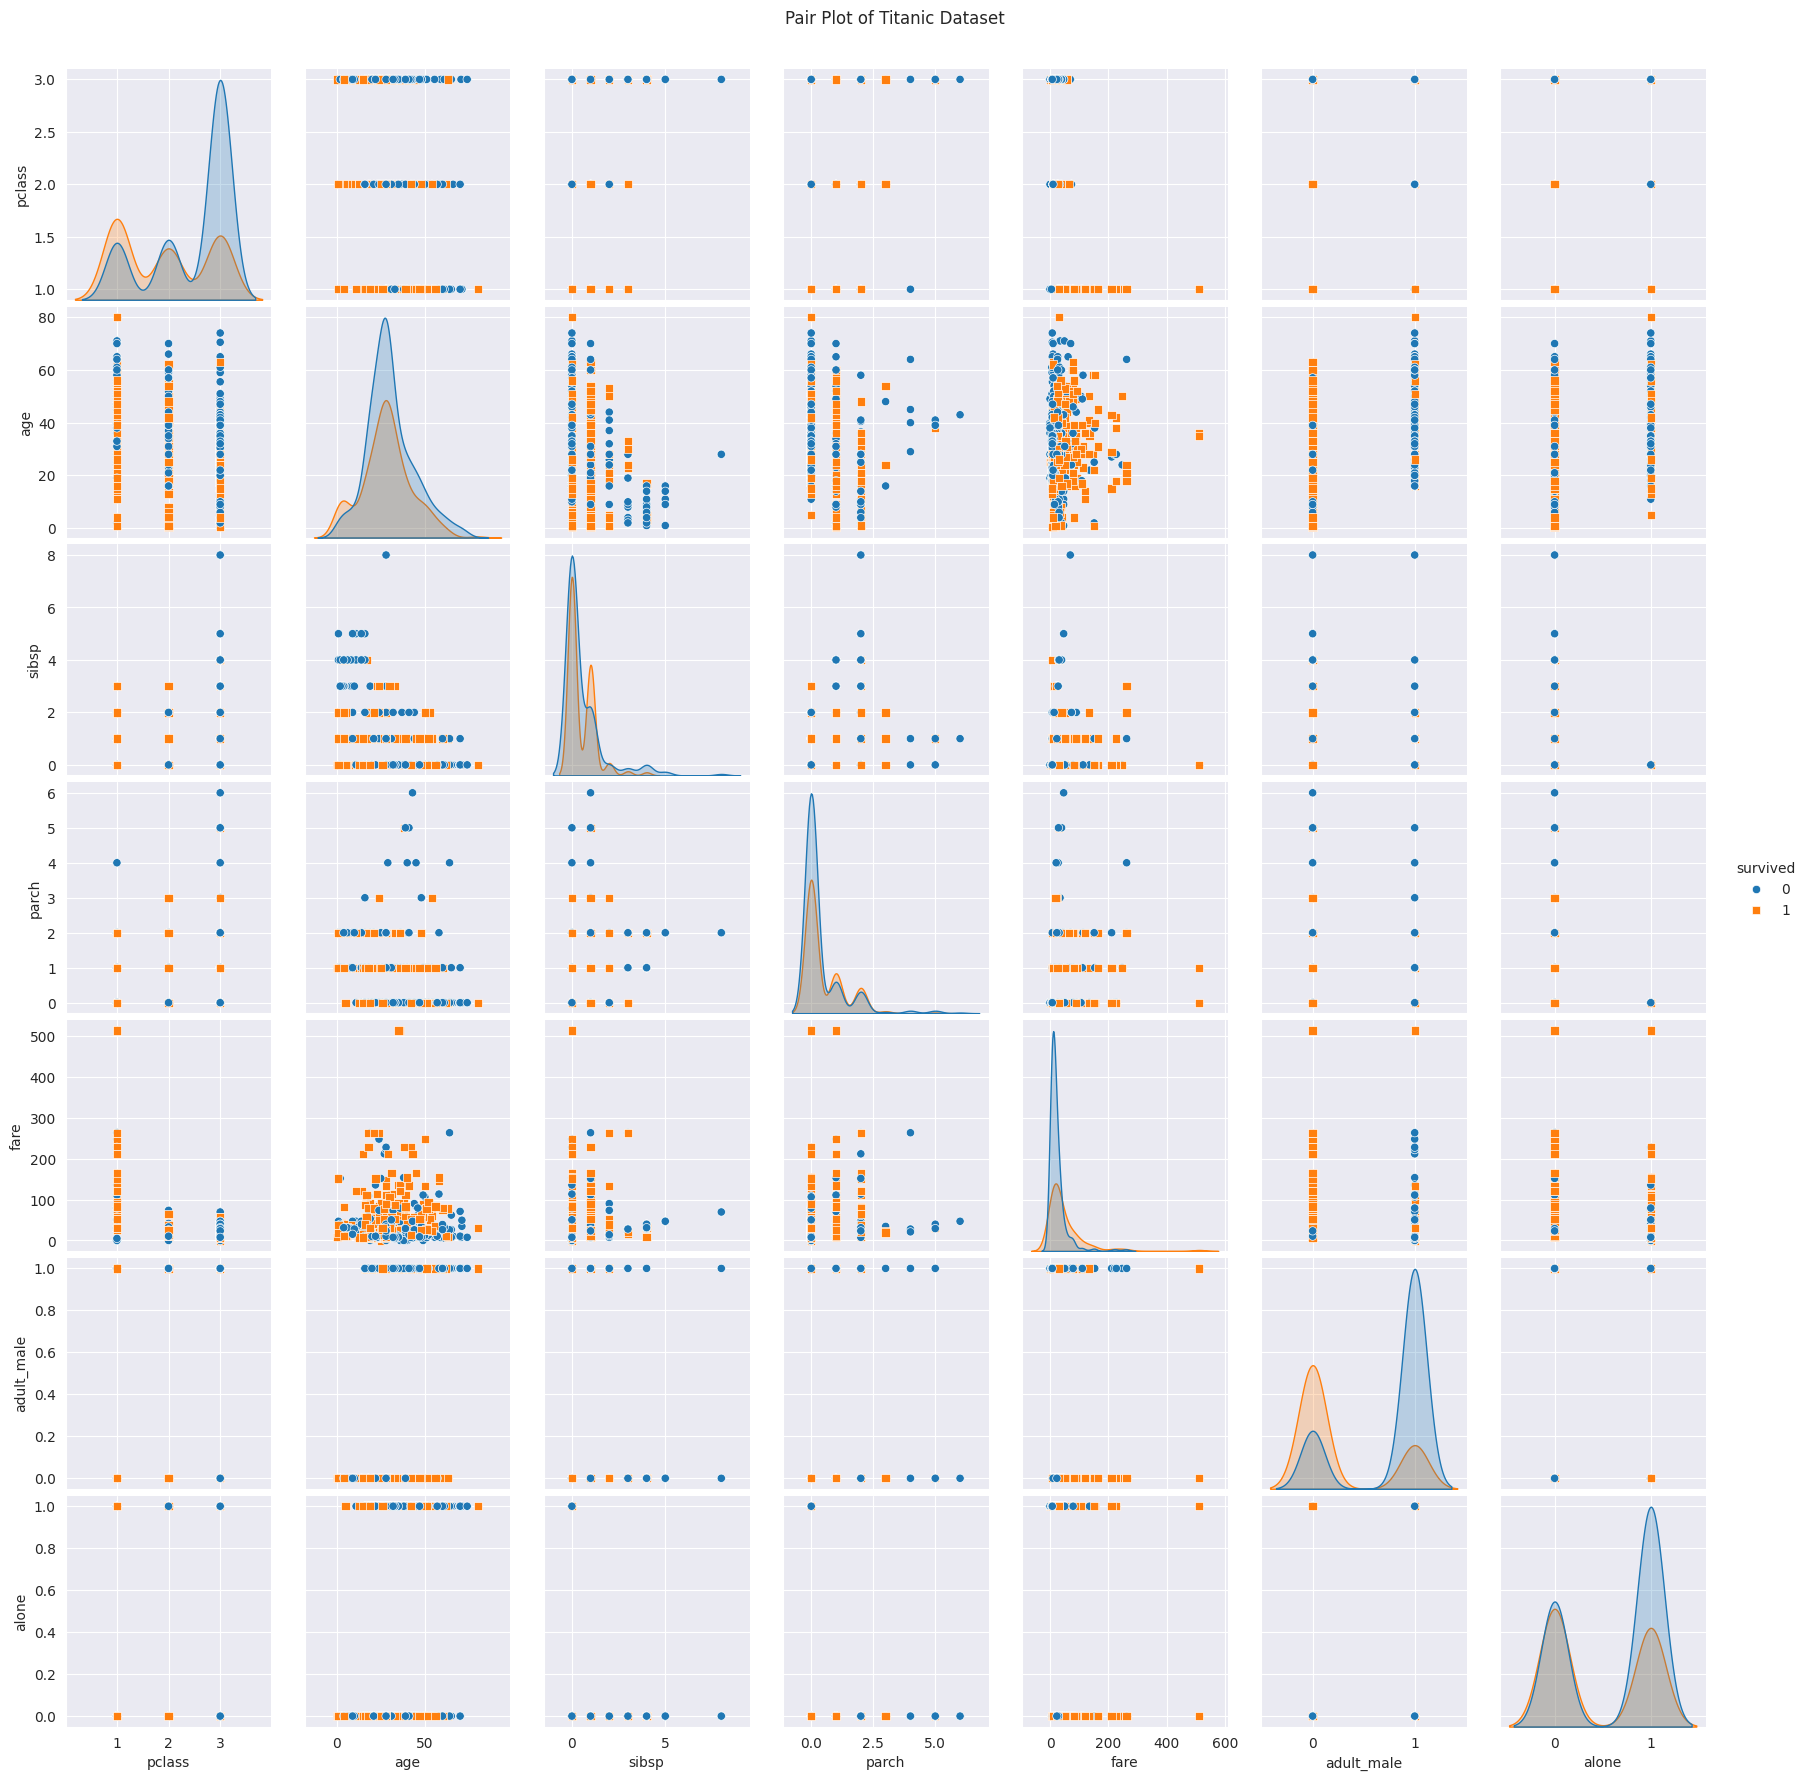

In [ ]:
# Visualizing the relationships using pair plot
sns.pairplot(titanic, hue='survived', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)
plt.show()

## Section 5: Outlier Detection

#### Importance of Handling Outliers

Outliers are data points that significantly deviate from other observations in the dataset. They can arise due to various reasons, including measurement errors, data entry errors, or genuine variability in the data.

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6lZJt72Kej7c9ZIl3mwVhQ6kBp-eJtSbPTQ&s"/></center>

#### Identifying Outliers

Identifying outliers is a critical step in the data analysis process. One effective way to identify outliers in numerical features is visualizing it through box plots.
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRp9k5-GYqNMQb68S9xZjj9plp9PdlkJOYwag&s" width=400/></center>



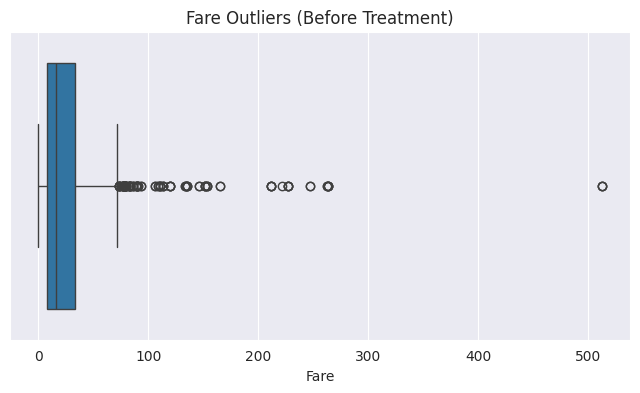

Number of fare outliers: 100


In [ ]:
# Visualizing outliers in 'Fare' before treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x=titanic['fare'])
plt.title('Fare Outliers (Before Treatment)')
plt.xlabel('Fare')
plt.show()

# Identifying outliers using the IQR method

# Calculating IQR for 'Fare'
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fare_outliers = titanic[(titanic['fare'] < lower_bound) | (titanic['fare'] > upper_bound)]
print(f"Number of fare outliers: {len(fare_outliers)}")

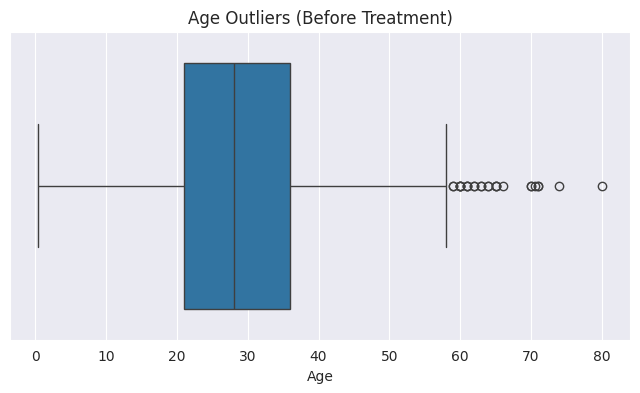

Number of age outliers: 26


In [ ]:
# Visualizing outliers in 'Age' before treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x=titanic['age'])
plt.title('Age Outliers (Before Treatment)')
plt.xlabel('Age')
plt.show()

# Calculating IQR for 'Age'
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = titanic[(titanic['age'] < lower_bound) | (titanic['age'] > upper_bound)]
print(f"Number of age outliers: {len(age_outliers)}")

#### Handling Outliers

Once identified, outliers can be handled through various strategies, depending on their nature and impact on the analysis:

1. **Removing Outliers:** This strategy involves excluding outliers from the dataset entirely. It is appropriate when outliers are determined to be errors or when they do not contribute meaningfully to the analysis.
Caution: Might lead to the loss of valuable information.

2. **Transforming Outliers:** In some cases, outliers can be transformed to reduce their impact - log transformation, square root transformation, or winsorizing or capping(replacing outliers with the nearest non-outlier value)

3. **Treating Outliers as Separate Categories:** Categorizing outliers separately to investigate these data points as distinct segments with unique characteristics.

4. **Imputation:** In some cases, particularly in predictive modeling, outliers can be replaced with more representative values, such as the median or mean of the non-outlier data.

The choice of strategy for handling outliers should be guided by the context of the analysis, the significance of the outliers, and the overall goals of the research.

#### **How are we treating the outliers?**

Capping - Adjusting the values so that any value above the upper bound is set to the upper bound, and any value below the lower bound is set to the lower bound.

**Why choose this method?**

- Capping helps to limit the influence of extreme values, making the dataset more stable for analysis and modeling.
- This method is straightforward and easy to implement, ensuring that all data points fall within a reasonable range without needing to remove them.
- It allows us to keep all data points, maintaining the size and integrity of the dataset while controlling the impact of outliers.


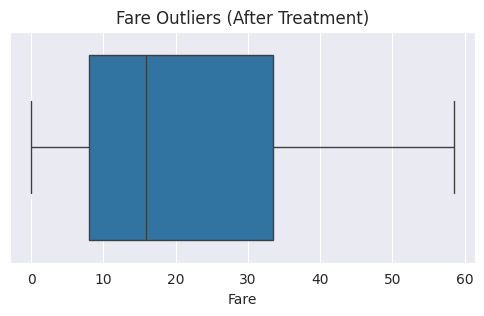

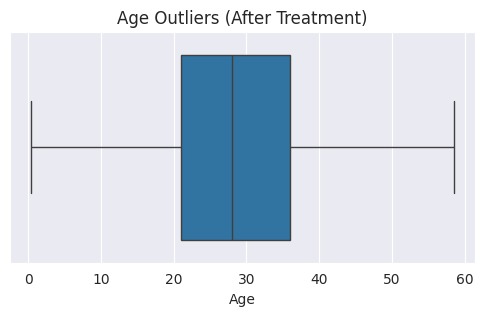

In [ ]:
# Treating fare outliers by capping
titanic['fare'] = titanic['fare'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Treating age outliers by capping
titanic['age'] = titanic['age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Visualizing outliers in 'Fare' after treatment
plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['fare'])
plt.title('Fare Outliers (After Treatment)')
plt.xlabel('Fare')
plt.show()

# Visualizing outliers in 'Age' after treatment
plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['age'])
plt.title('Age Outliers (After Treatment)')
plt.xlabel('Age')
plt.show()

<hr></hr>

## Section 6: Feature Engineering

### Importance of Feature Engineering

Feature engineering is a crucial step in the data preprocessing phase that involves creating new features or transforming existing ones to enhance the performance of machine learning models. It serves several important purposes:

- Deriving new features could capture hidden patterns or relationships within the data

- Creating features that align with domain knowledge would help stakeholders understand the factors driving predictions.

- Many machine learning algorithms require numerical input. Feature engineering allows us to convert categorical features into a numerical format that algorithms can work with.

### 5.1 Converting Categorical Features to Numerical

One common approach to convert categorical features into a numerical format is **one-hot encoding**. This technique involves creating binary columns for each category, allowing models to interpret categorical data effectively.

#### One-Hot Encoding

- **Process:** One-hot encoding converts categorical variables into a series of binary columns. For instance, the `sex` column in the Titanic dataset will be transformed into a new column called `sex_male`, with 0 representing female and 1 representing male.

<center><img src="https://miro.medium.com/v2/resize:fit:837/1*d5-PQyRRjvzBZjI5f7X3hA.png" width=500 /></center>

In [ ]:
# Feature Engineering

# Converting categorical features (4 columns) to numerical using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who'], drop_first=True)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0,3,22.0,1,0,7.250,True,Southampton,no,False,True,False,True,False,True,True,False
1,1,1,38.0,1,0,58.500,False,Cherbourg,yes,False,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.925,False,Southampton,yes,True,False,False,True,False,True,False,True
3,1,1,35.0,1,0,53.100,False,Southampton,yes,False,False,False,True,False,False,False,True
4,0,3,35.0,0,0,8.050,True,Southampton,no,True,True,False,True,False,True,True,False


### 5.2 Creating New Features

Feature engineering also involves creating new features from existing ones to capture additional information. Here are a few examples of how we can create new features in the Titanic dataset:

#### 1. Family Size

The Titanic dataset contains two columns, `sibsp` (number of siblings/spouses aboard) and `parch` (number of parents/children aboard). By combining these two features, we can create a new feature called `Family_Size`, which represents the total number of family members traveling together:

- **Formula:**
  $$
  \text{Family_Size} = \text{sibsp} + \text{parch} + 1
  $$
  (The +1 accounts for the passenger themselves.)

#### 2. Is Alone

Using the `Family_Size` feature, we can create a binary feature called `Is_Alone`, which indicates whether a passenger was traveling alone. This feature can be helpful in understanding survival rates, as being alone or part of a larger family may influence outcomes.

- **Formula:**
  $$
  \text{Is_Alone} =
  \begin{cases}
  1 & \text{if Family_Size} = 1 \\
  0 & \text{otherwise}
  \end{cases}
  $$

#### 3. Fare Per Person

The `fare` feature represents the total fare paid by a passenger’s family or group. To gain insight into the financial burden per individual, we can create a new feature called `Fare_Per_Person` by dividing the total fare by the `Family_Size`.

- **Formula:**
  $$
  \text{Fare_Per_Person} = \frac{\text{fare}}{\text{Family_Size}}
  $$

In [ ]:
# Creating new feature 'Family_Size'
titanic['Family_Size'] = titanic['sibsp'] + titanic['parch'] + 1

# Creating new feature 'Is_Alone'
titanic['Is_Alone'] = (titanic['Family_Size'] == 1).astype(int)

# Creating new feature 'Fare_Per_Person'
titanic['Fare_Per_Person'] = titanic['fare'] / titanic['Family_Size']

# Display the first few rows of the transformed dataset
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,Family_Size,Is_Alone,Fare_Per_Person
0,0,3,22.0,1,0,7.250,True,Southampton,no,False,True,False,True,False,True,True,False,2,0,3.625
1,1,1,38.0,1,0,58.500,False,Cherbourg,yes,False,False,False,False,False,False,False,True,2,0,29.250
2,1,3,26.0,0,0,7.925,False,Southampton,yes,True,False,False,True,False,True,False,True,1,1,7.925
3,1,1,35.0,1,0,53.100,False,Southampton,yes,False,False,False,True,False,False,False,True,2,0,26.550
4,0,3,35.0,0,0,8.050,True,Southampton,no,True,True,False,True,False,True,True,False,1,1,8.050


### 5.3 Visualizing the New Features

Visualizations can greatly aid our understanding of the distribution and impact of the newly created features. Here are some suggested visualizations:

#### Family Size Distribution

- A count plot can show the distribution of the `Family_Size` feature, helping us understand how many passengers traveled alone versus with family members.

#### Is Alone Distribution

- A count plot of the `Is_Alone` feature provides insight into the proportion of passengers who were traveling alone, which could correlate with survival rates.

#### Fare Per Person Distribution

- A histogram with a kernel density estimate (KDE) overlay for the `Fare_Per_Person` feature allows us to visualize the distribution of fare expenses per individual, providing insights into the economic backgrounds of the passengers.


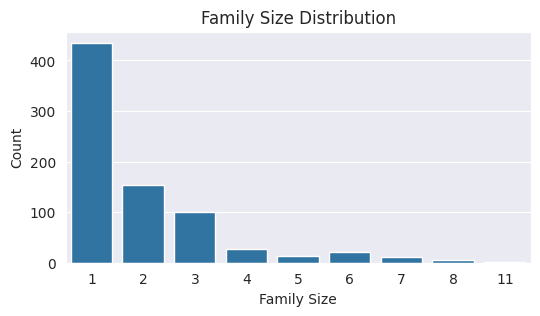

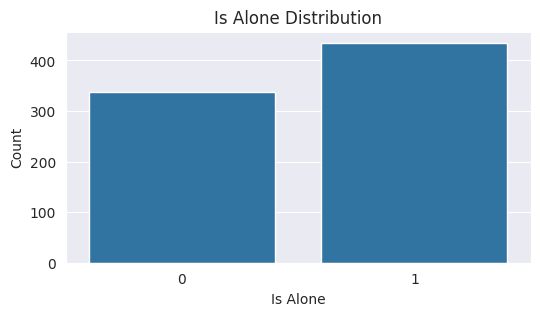

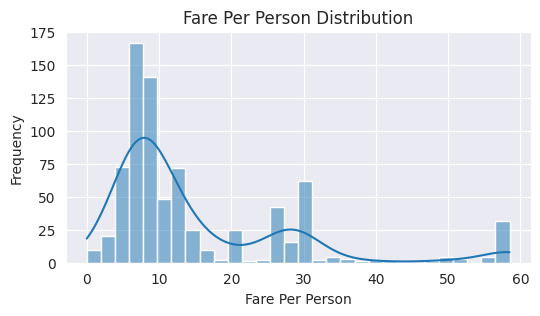

In [ ]:
# Visualizing the new features
# Family Size Distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='Family_Size', data=titanic)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Is Alone Distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='Is_Alone', data=titanic)
plt.title('Is Alone Distribution')
plt.xlabel('Is Alone')
plt.ylabel('Count')
plt.show()

# Fare Per Person Distribution
plt.figure(figsize=(6, 3))
sns.histplot(titanic['Fare_Per_Person'], bins=30, kde=True)
plt.title('Fare Per Person Distribution')
plt.xlabel('Fare Per Person')
plt.ylabel('Frequency')
plt.show()


#### Interpretation:

**Family Size Distribution:**
- The majority of passengers were traveling alone, as indicated by the highest count for a family size of 1.
- Family sizes of 2 and 3 also have notable counts, suggesting a significant number of small families.
- Larger family sizes (4 and above) are relatively rare, with counts decreasing as family size increases.

**Is Alone Distribution:**
- A significant portion of passengers were traveling alone, as indicated by the higher count for 'Is Alone' value of 1.
- The difference between solo travelers and those with companions is noticeable but not extremely large.

**Fare per person Distribution:**
- The distribution of fare per person is right-skewed, with most passengers paying lower fares.
- The highest frequency of passengers paid fares between 5 and 15 units.
- The curve suggests a sharp drop in the number of passengers as the fare increases, with a few exceptions at higher fare ranges.


## What Next?

With the data analysis and preparation complete, we are now poised to build and evaluate machine learning models aimed at predicting the survival of Titanic passengers.
<hr></hr>
<hr></hr>

# Advanced Topics for Post Class Reference

## Violin Plots

Violin plots are a powerful tool for visualizing the distribution of a dataset. They combine aspects of a box plot and a density plot, showing the density of the data at different values. Violin plots are particularly useful for comparing the distribution of the data across different categories. Below are some examples of violin plots using the Titanic dataset.

#### Fare vs Pclass by Survival

This plot illustrates the distribution of fares across different passenger classes (`pclass`) and how these distributions differ between passengers who survived and those who did not.


In the `Fare vs Pclass by Survival` plot:
- **X-axis**: Passenger class (`pclass`).
- **Y-axis**: Fare paid by passengers (`fare`).
- **Hue**: Survival status (`survived`), with the plot split to show both survived and non-survived passengers.

#### Fare vs Sex by Survival

This plot shows the distribution of fares across different genders (`sex`) and highlights the differences in fare distribution between passengers who survived and those who did not.


In the `Fare vs Sex by Survival` plot:
- **X-axis**: Gender of the passengers (`sex`).
- **Y-axis**: Fare paid by passengers (`fare`).
- **Hue**: Survival status (`survived`), with the plot split to show both survived and non-survived passengers.

These violin plots provide a comprehensive view of the data distribution, allowing for detailed comparisons between different groups within the dataset. They are particularly useful in identifying patterns and differences in the distribution that may not be immediately apparent with other types of plots.

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'embark_town', 'alive', 'alone', 'sex_male', 'embarked_q', 'embarked_s',
       'class_second', 'class_third', 'who_man', 'who_woman', 'family_size',
       'is_alone', 'fare_per_person', 'who'],
      dtype='object')


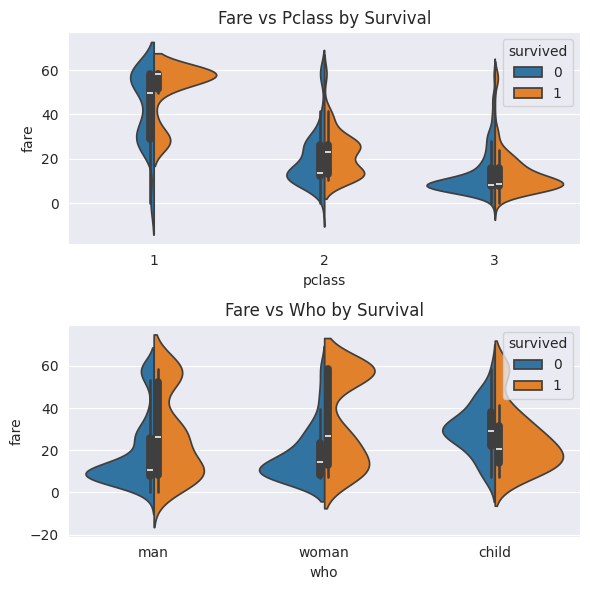

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'titanic' DataFrame is properly loaded
# Assuming 'titanic' DataFrame is already loaded

# Check and standardize column names
titanic.columns = titanic.columns.str.strip().str.lower()
print(titanic.columns)

# Create a new 'who' column based on 'who_man' and 'who_woman'
titanic['who'] = titanic.apply(lambda row: 'man' if row['who_man'] == 1 else ('woman' if row['who_woman'] == 1 else 'child'), axis=1)

# Create subplots for violin plots
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

# Violin plot for Fare vs Pclass by Survival
sns.violinplot(x='pclass', y='fare', hue='survived', data=titanic, split=True, ax=axes[0])
axes[0].set_title('Fare vs Pclass by Survival')

# Violin plot for Fare vs Who by Survival
sns.violinplot(x='who', y='fare', hue='survived', data=titanic, split=True, ax=axes[1])
axes[1].set_title('Fare vs Who by Survival')

plt.tight_layout()
plt.show()

## Facet Grid

We will use FacetGrid to visualize the distribution of the `age` variable across different categories.

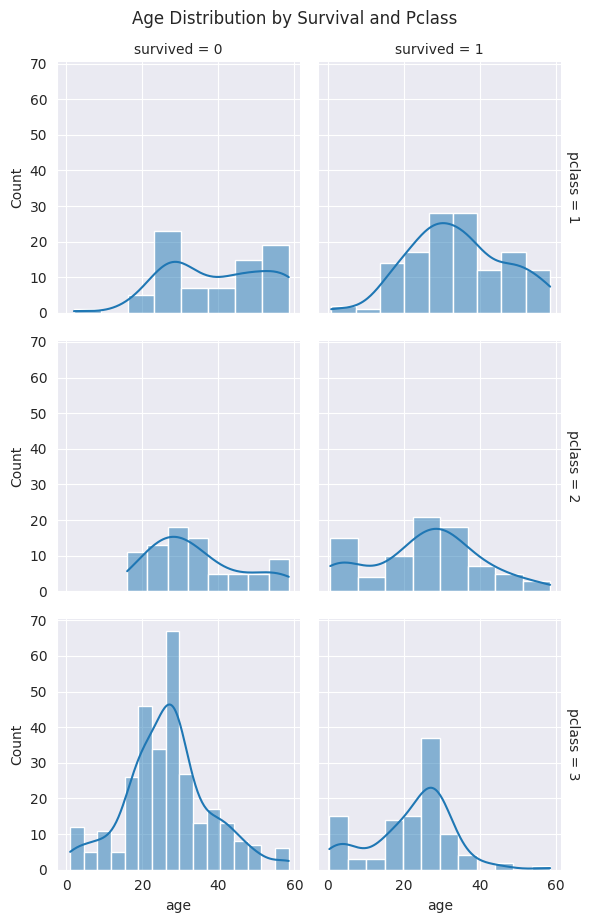

In [ ]:
g = sns.FacetGrid(titanic, col='survived', row='pclass', margin_titles=True)
g.map(sns.histplot, 'age', kde=True)
g.fig.suptitle('Age Distribution by Survival and Pclass', y=1.02)
plt.show()

# Swarm Plots

We will use swarm plots to show the distribution of the `age` and `fare` variables within different categories.

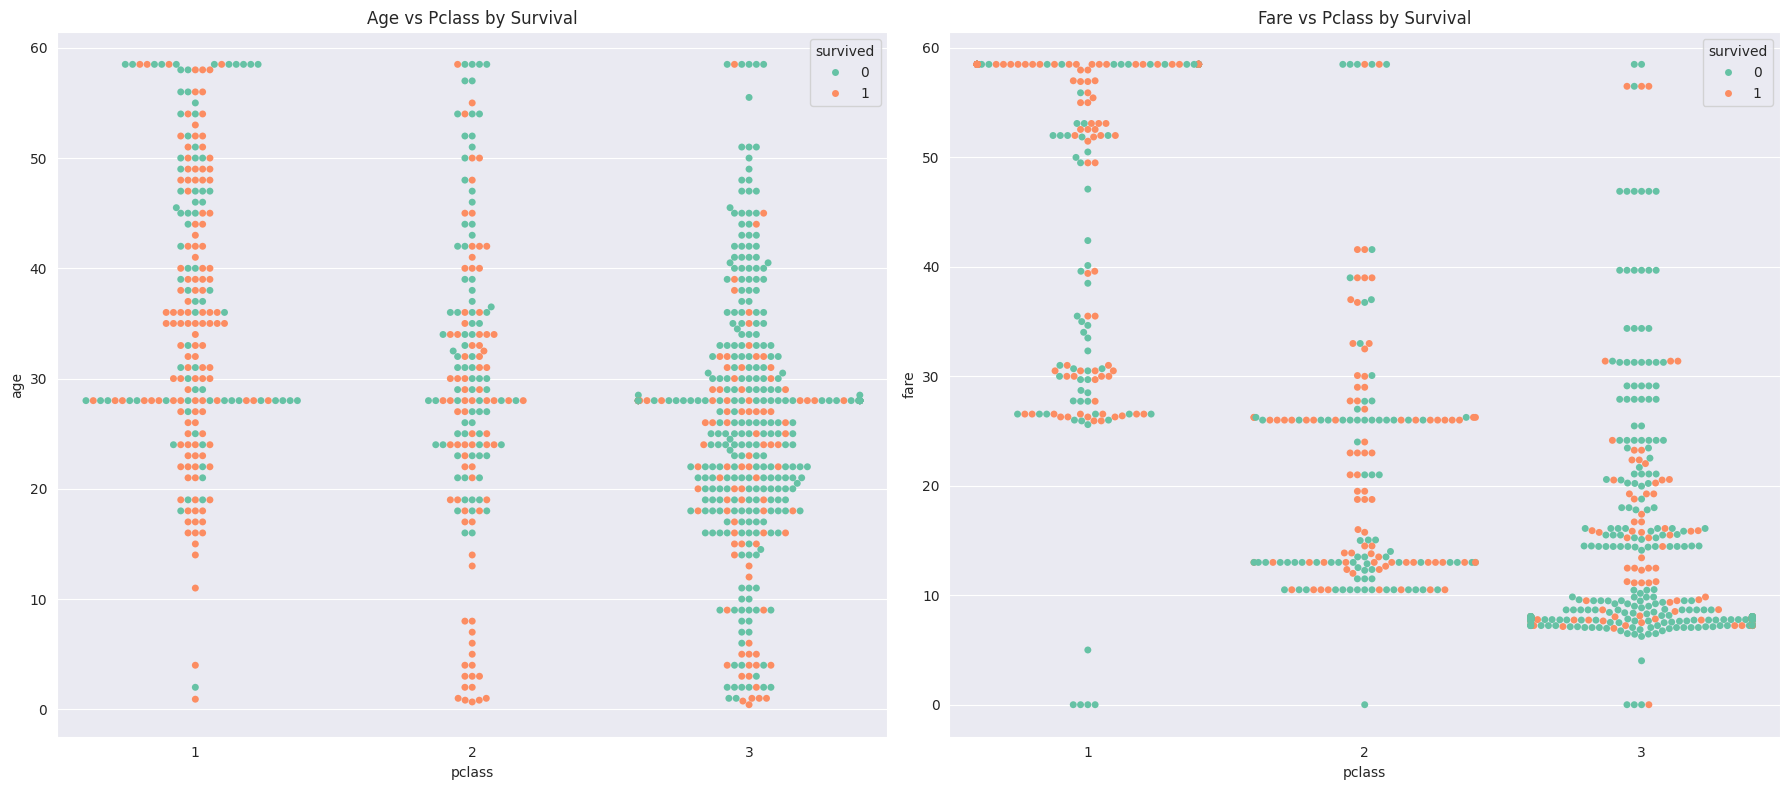

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.swarmplot(x='pclass', y='age', hue='survived', data=titanic, ax=axes[0], palette='Set2')
axes[0].set_title('Age vs Pclass by Survival')
sns.swarmplot(x='pclass', y='fare', hue='survived', data=titanic, ax=axes[1], palette='Set2')
axes[1].set_title('Fare vs Pclass by Survival')
plt.tight_layout()
plt.show()

# Joint Plots

We will use joint plots to visualize the relationship between `age` and `fare` along with their distributions.

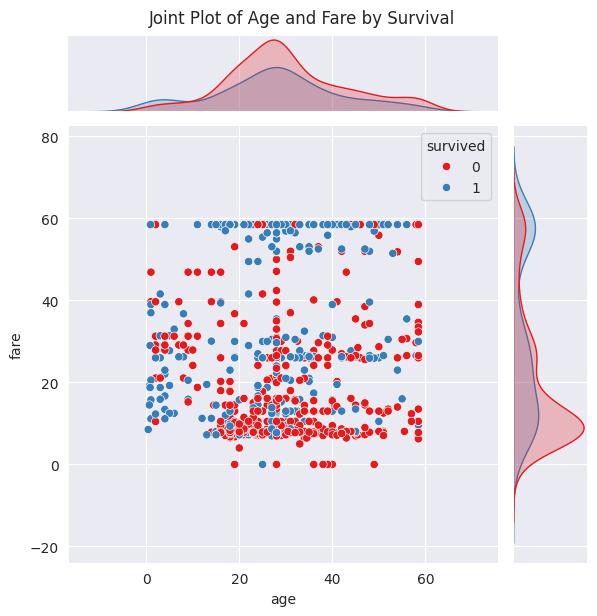

In [ ]:
sns.jointplot(x='age', y='fare', data=titanic, kind='scatter', hue='survived', palette='Set1')
plt.suptitle('Joint Plot of Age and Fare by Survival', y=1.02)
plt.show()

<hr></hr>
<hr></hr>